In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/Competition_Data.csv")

# Convertir Fiscal_Week_ID a string si es necesario
df['Fiscal_Week_ID'] = df['Fiscal_Week_ID'].astype(str)

# Asegurarse de seleccionar columnas numéricas para cálculos
numeric_cols = ['Price', 'Item_Quantity', 'Sales_Amount_No_Discount', 'Sales_Amount', 'Competition_Price']


print(df.head())

   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity   
0      0        2019-11  store_459  item_526  134.49            435  \
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


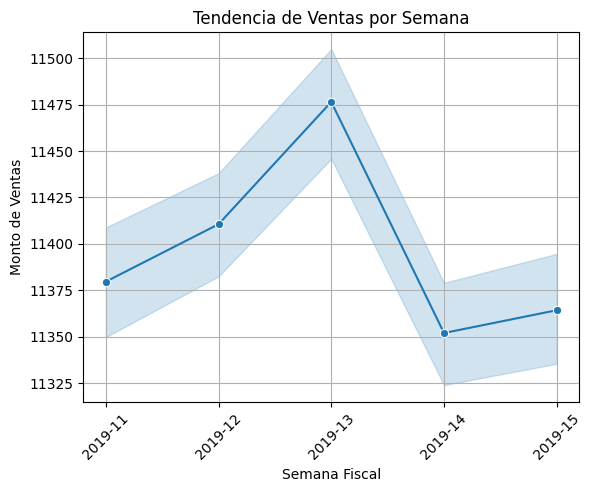

In [10]:
# 1. Tendencia de Ventas por Semana
plt.figure()
sns.lineplot(data=df, x='Fiscal_Week_ID', y='Sales_Amount', marker='o')
plt.title('Tendencia de Ventas por Semana')
plt.xlabel('Semana Fiscal')
plt.ylabel('Monto de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

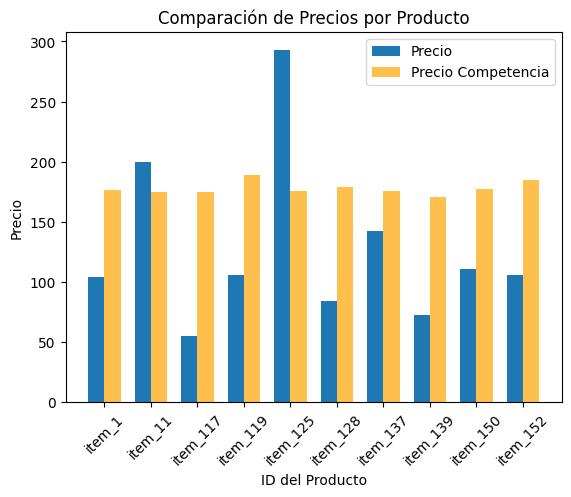

In [13]:
# 2. Comparación de Precios vs. Precio Competencia
plt.figure()
store_sample = df.groupby(['Item_ID'])[numeric_cols].mean().head(10)
bar_width = 0.35
index = range(len(store_sample))
plt.bar(index, store_sample['Price'], bar_width, label='Precio')
plt.bar([i + bar_width for i in index], store_sample['Competition_Price'], bar_width, 
        label='Precio Competencia', color='orange', alpha=0.7)
plt.xticks([i + bar_width / 2 for i in index], store_sample.index, rotation=45)
plt.title('Comparación de Precios por Producto')
plt.xlabel('ID del Producto')
plt.ylabel('Precio')
plt.legend()
plt.show()

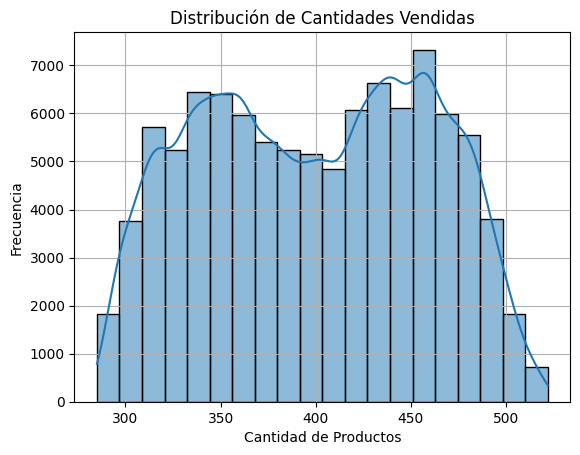

In [14]:
# 3. Distribución de Cantidades Vendidas
plt.figure()
sns.histplot(df['Item_Quantity'], bins=20, kde=True)
plt.title('Distribución de Cantidades Vendidas')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

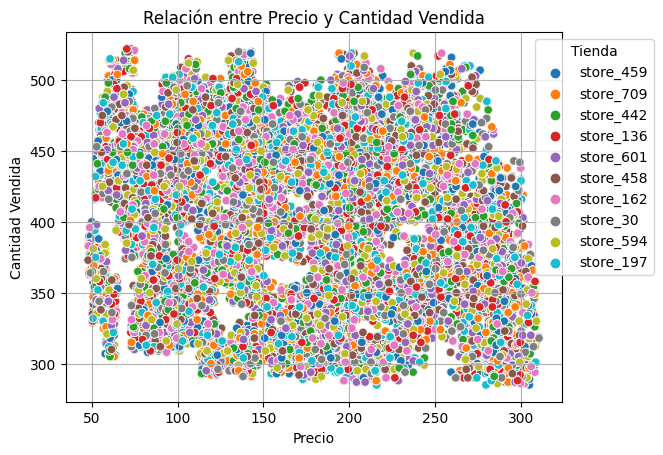

In [15]:
# 4. Relación entre Precio y Cantidad Vendida
plt.figure()
sns.scatterplot(data=df, x='Price', y='Item_Quantity', hue='Store_ID', alpha=0.7)
plt.title('Relación entre Precio y Cantidad Vendida')
plt.xlabel('Precio')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Tienda', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

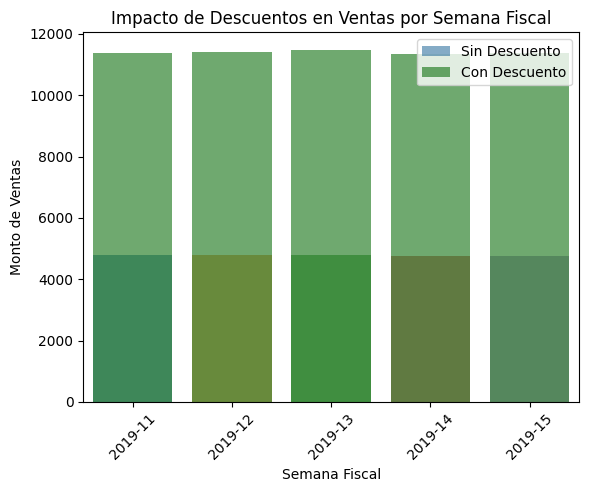

In [16]:
# 5. Impacto de Descuentos en Ventas
plt.figure()
discount_sample = df.groupby('Fiscal_Week_ID')[numeric_cols].mean().reset_index()
sns.barplot(x='Fiscal_Week_ID', y='Sales_Amount_No_Discount', data=discount_sample, label='Sin Descuento', alpha=0.6)
sns.barplot(x='Fiscal_Week_ID', y='Sales_Amount', data=discount_sample, label='Con Descuento', color='green', alpha=0.6)
plt.legend()
plt.title('Impacto de Descuentos en Ventas por Semana Fiscal')
plt.xlabel('Semana Fiscal')
plt.ylabel('Monto de Ventas')
plt.xticks(rotation=45)
plt.show()

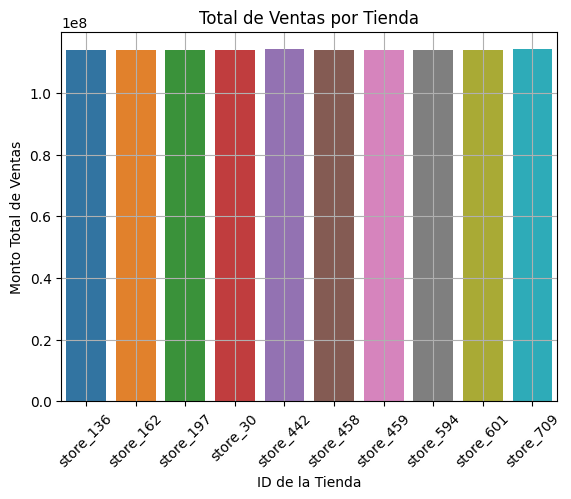

In [17]:
# 1. Total de Ventas por Tienda
plt.figure()
sales_by_store = df.groupby('Store_ID')['Sales_Amount'].sum().reset_index()
sns.barplot(data=sales_by_store, x='Store_ID', y='Sales_Amount')
plt.title('Total de Ventas por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


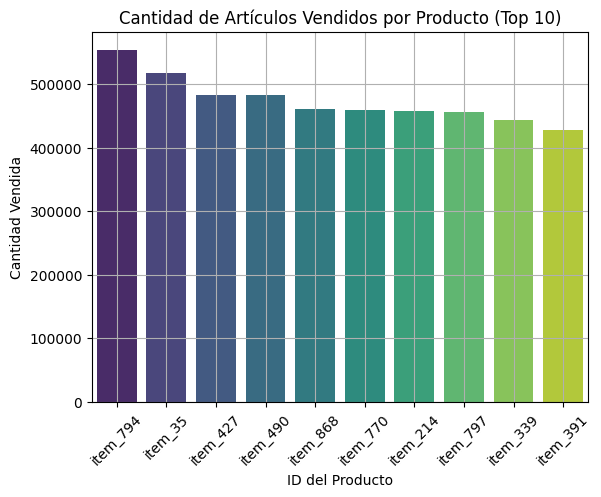

In [18]:
# 2. Cantidad de Artículos Vendidos por Producto
plt.figure()
quantity_by_item = df.groupby('Item_ID')['Item_Quantity'].sum().reset_index().sort_values(by='Item_Quantity', ascending=False).head(10)
sns.barplot(data=quantity_by_item, x='Item_ID', y='Item_Quantity', palette='viridis')
plt.title('Cantidad de Artículos Vendidos por Producto (Top 10)')
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


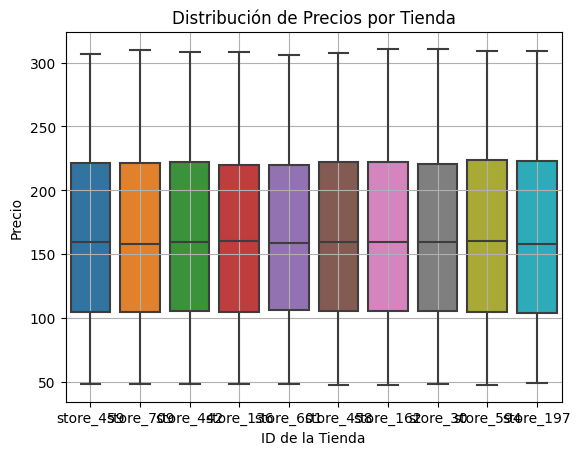

In [19]:
# 3. Distribución del Precio de los Productos
plt.figure()
sns.boxplot(data=df, x='Store_ID', y='Price')
plt.title('Distribución de Precios por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

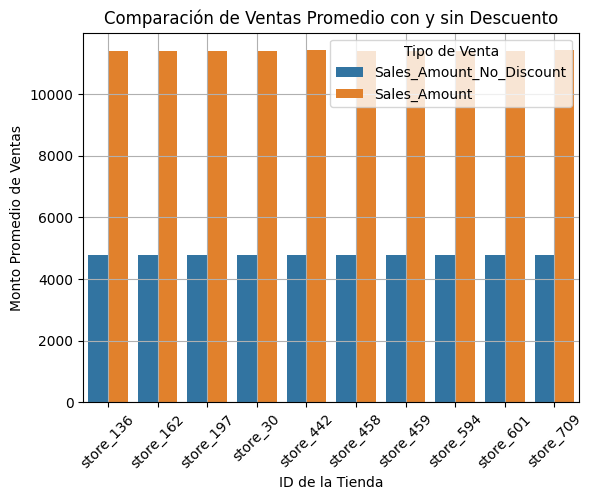

In [20]:
# 4. Comparación de Ventas con y sin Descuento
plt.figure()
discount_comparison = df.groupby('Store_ID')[['Sales_Amount_No_Discount', 'Sales_Amount']].mean().reset_index()
discount_comparison = pd.melt(discount_comparison, id_vars='Store_ID', value_vars=['Sales_Amount_No_Discount', 'Sales_Amount'], var_name='Tipo de Venta', value_name='Monto Promedio')
sns.barplot(data=discount_comparison, x='Store_ID', y='Monto Promedio', hue='Tipo de Venta')
plt.title('Comparación de Ventas Promedio con y sin Descuento')
plt.xlabel('ID de la Tienda')
plt.ylabel('Monto Promedio de Ventas')
plt.legend(title='Tipo de Venta')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

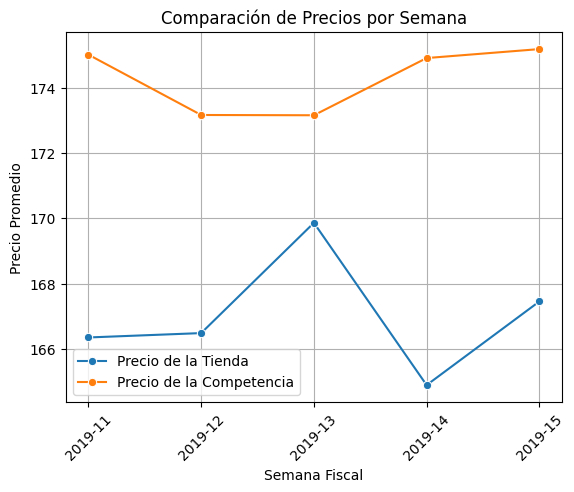

In [21]:
# 5. Análisis de Precios Competitivos por Semana
plt.figure()
competitive_pricing = df.groupby('Fiscal_Week_ID')[['Price', 'Competition_Price']].mean().reset_index()
sns.lineplot(data=competitive_pricing, x='Fiscal_Week_ID', y='Price', label='Precio de la Tienda', marker='o')
sns.lineplot(data=competitive_pricing, x='Fiscal_Week_ID', y='Competition_Price', label='Precio de la Competencia', marker='o')
plt.title('Comparación de Precios por Semana')
plt.xlabel('Semana Fiscal')
plt.ylabel('Precio Promedio')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()